In [1]:
# Cargar bibliotecas necesarias
# Para instalarlas por primera vez: install.packages("ggplot2")
# 
library(lubridate) # For handling Date variables
library(ggplot2)
library(scales) # For percent_format()
library(RColorBrewer)
library(TTR) # for EMA (Exponential Moving Average)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [12]:
# Leer archivo de datos diarios de una ciudad específica (Por ejemplo Hermosillo)
df0 <- read.csv(file="Guaymas_1967_2016.csv", header=F, sep=",", stringsAsFactors=FALSE)
df0$V6 <- NULL
names(df0) <- c("date", "Precip", "Evap", "Tmax", "Tmin")

# Convertir a variables numéricas
df0$Precip <- as.numeric(df0$Precip);
df0$Evap <- as.numeric(df0$Evap);
df0$Tmax <- as.numeric(df0$Tmax);
df0$Tmin <- as.numeric(df0$Tmin);

# Cambiar formato de fecha a Año-Mes-Día 
df0$date <- format(as.Date(df0$date, format = "%d/%m/%Y"), "%Y-%m-%d")

# Seleccionar datos de Abril a Noviembre 
df1_tmp1 <- df0[(format.Date(df0$date, "%m") >= "04" & !is.na(df0$date)),]
df1 <- df1_tmp1[(format.Date(df1_tmp1$date, "%m") <= "11" & !is.na(df1_tmp1$date)),]
# Seleccionar los datos entre los años 1981 y 2010
df1_tmp2 <- df1[(format.Date(df1$date, "%Y") >= "1981" & !is.na(df1$date)),]
df2 <- df1_tmp2[(format.Date(df1_tmp2$date, "%Y") <= "2010" & !is.na(df1_tmp2$date)),]

# Agregar clasificación por mes
df2$Month <- factor(month(df2$date),
                         labels = c("Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov"))


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [14]:
# Explorar datos: min, cuartiles, promedio, máximo
MaxT <- df2$Tmax
summary(MaxT)
# Tomar el valor promedio (Mean) para insertarlo en la posición de la línea vertical 
# en el histograma de abajo

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  19.00   33.00   36.50   35.84   39.00   48.50       2 

 Mean 
35.84 

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”

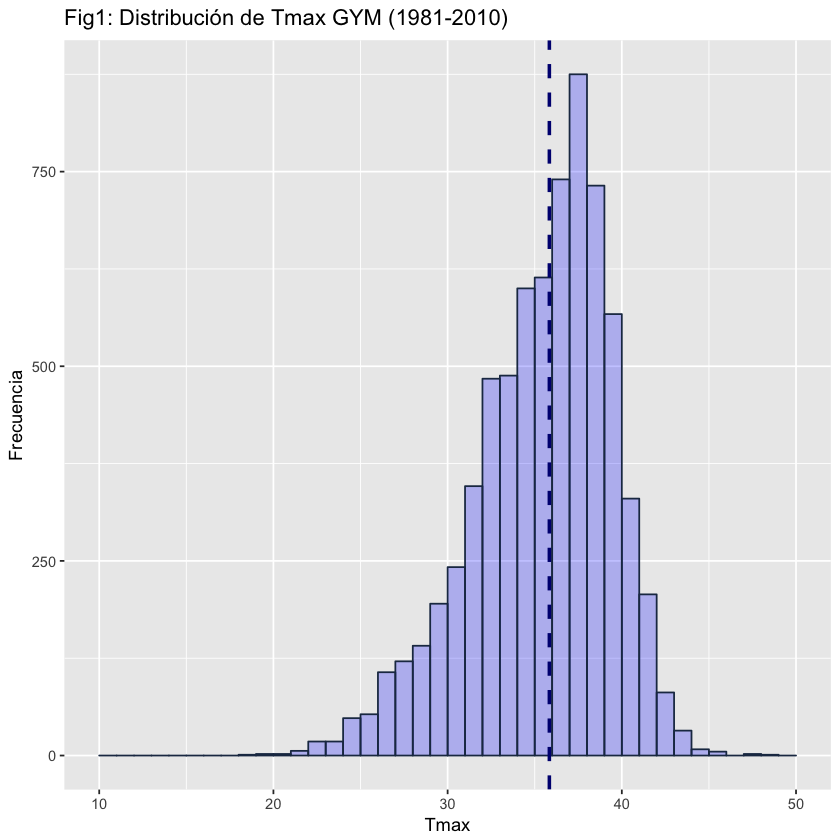

In [17]:
# Histograma de la Climatología de referencia base (1981-2010)
# La línea vertical punteada es el valor promedio de Tmax ... será 35.8ºC para HMO
df2_mean <- as.array(summary(df2$Tmax)[4])
df2_mean
ggplot(data=df2, aes(df2$Tmax)) + 
# Rango de temperaturas entre 10ºC y 50ºC
  geom_histogram(breaks=seq(10, 50), 
                 col="#1F3552", 
                 fill="blue", 
                 alpha = .25) + 
  labs(title="Fig1: Distribución de Tmax GYM (1981-2010)") +
  labs(x="Tmax", y="Frecuencia") +
# Insertar aqui el valor promedio de Tmax: 35.84 para GYM
  geom_vline(xintercept = 35.84, linetype="dashed", 
                color = "navy", size=1.0)
  

In [16]:
summary(df2$Tmax)
sd(df2$Tmax, na.rm=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  19.00   33.00   36.50   35.84   39.00   48.50       2 

[1] 3.946624

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

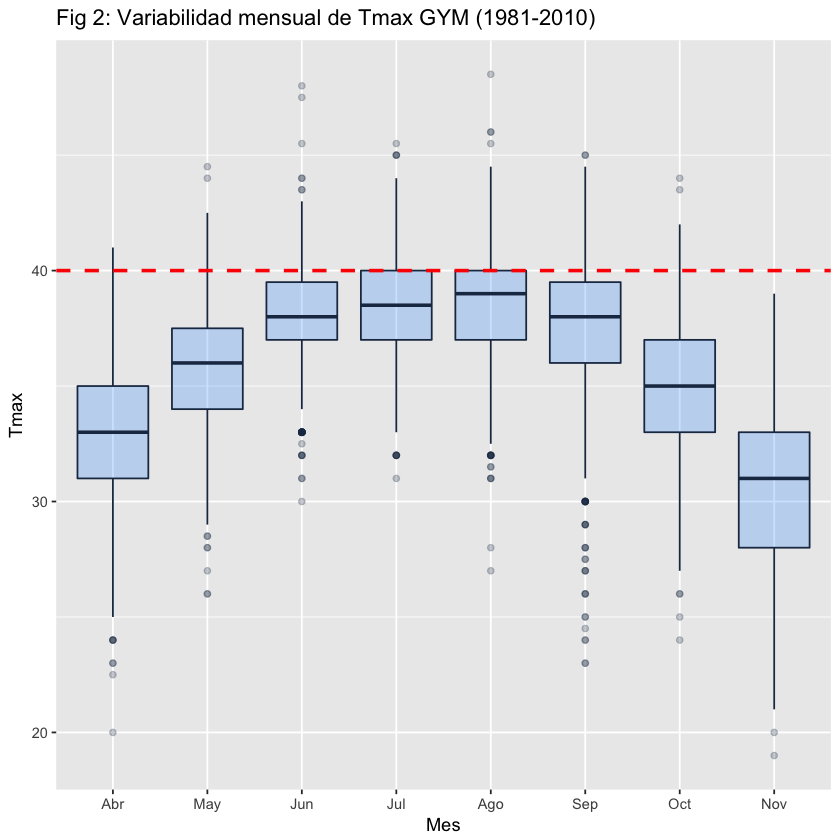

In [18]:
# Gráfica de cajas (boxplot) para mostrar la variabilidad climática
# Proporciona los valores extremos Min, 1er cuartil, Mediana, 3er cuartil y Máx 
# Cada cuartil tiene 25% de los datos.
# Existen un par de datos que se salen de lo normal (anomalías válidas)
fill <- "#3399FF"
line <- "#1F3552"
ggplot(df2, aes(x = Month, y = Tmax)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
        scale_x_discrete(name = "Mes") +
        ggtitle("Fig 2: Variabilidad mensual de Tmax GYM (1981-2010)") +
        geom_hline(yintercept=40, linetype="dashed", color = "red", size=1.0)

In [33]:
# Use los mismos datos del SMN, el complemento...
# Trabajar con el resto de los datos posteriores a 2010
# Seleccionar los datos de los años mayores a 2010
dfNew2 <- df1[(format.Date(df1$date, "%Y") >= "2011" & !is.na(df1$date)),]

# Agregar clasificación por mes
dfNew2$Month <- factor(month(dfNew2$date),
                         labels = c("Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov"))
summary(dfNew2$Tmax)
sd(dfNew2$Tmax, na.rm=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  22.00   33.00   36.00   35.11   38.00   43.00       1 

[1] 3.761726

 Mean 
35.11 

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

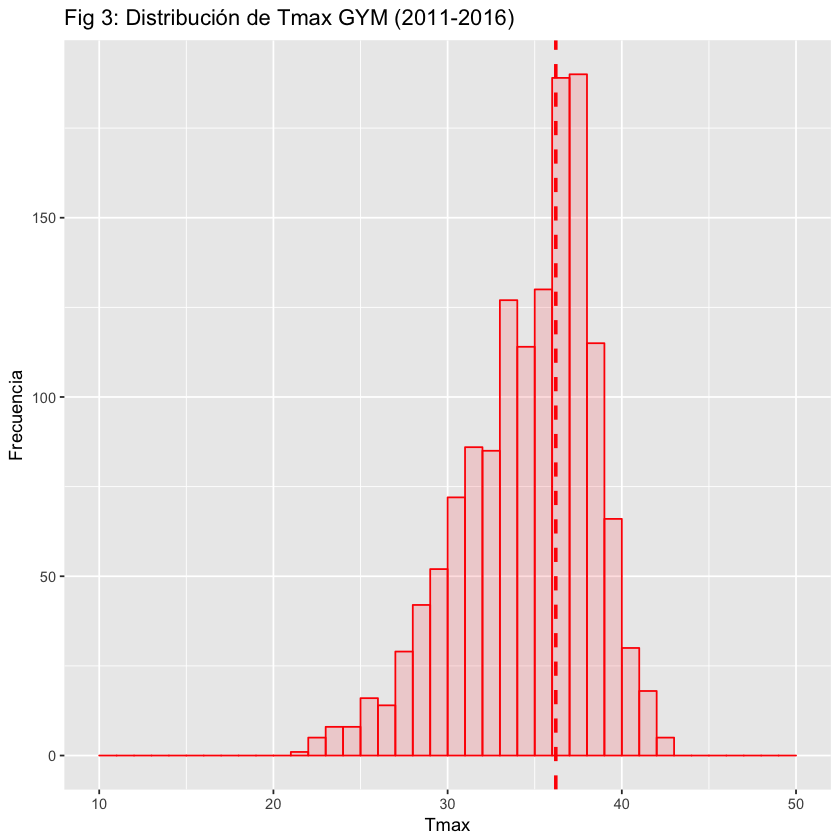

In [20]:
# Producir el histograma de distribución de Tmax
dfNew2_mean <- as.array(summary(dfNew2$Tmax)[4])
dfNew2_mean
ggplot(data=dfNew2, aes(dfNew2$Tmax)) + 
# Rango de temperaturas entre 10ºC y 50ºC
  geom_histogram(breaks=seq(10, 50), 
                 col="red", 
                 fill="#FF6666", 
                 alpha = .2) + 
  labs(title="Fig 3: Distribución de Tmax GYM (2011-2016)") +
  labs(x="Tmax", y="Frecuencia") +
# Insertar aqui el valor promedio de Tmax: 35.11 para Guaymas
  geom_vline(xintercept = 36.21, linetype="dashed", 
                color = "red", size=1.0)
  

In [22]:
summary(dfNew2$Tmax)
sd(dfNew2$Tmax, na.rm = TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  22.00   33.00   36.00   35.11   38.00   43.00       1 

[1] 3.761726

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”

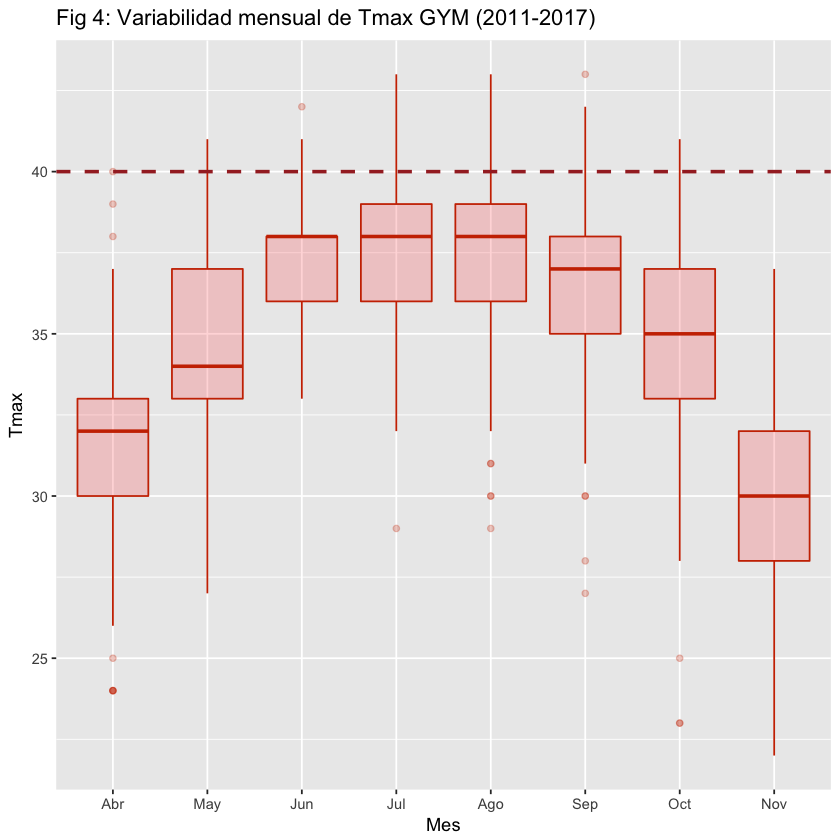

In [23]:
# Producir el diagrama de cajas, para mostrar la variabilidad climática 2011-2017
fill <- "#FF6666"
line <- "#CC3300"
ggplot(dfNew2, aes(x = Month, y = Tmax)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
        scale_x_discrete(name = "Mes") +
        ggtitle("Fig 4: Variabilidad mensual de Tmax GYM (2011-2017)") +
        geom_hline(yintercept=40, linetype="dashed", color = "brown", size=1.0)


In [24]:
# Resumen de datos (verificar que no hay valores anómalos)
summary(df2$Tmax)
summary(dfNew2$Tmax)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  19.00   33.00   36.50   35.84   39.00   48.50       2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  22.00   33.00   36.00   35.11   38.00   43.00       1 

Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”

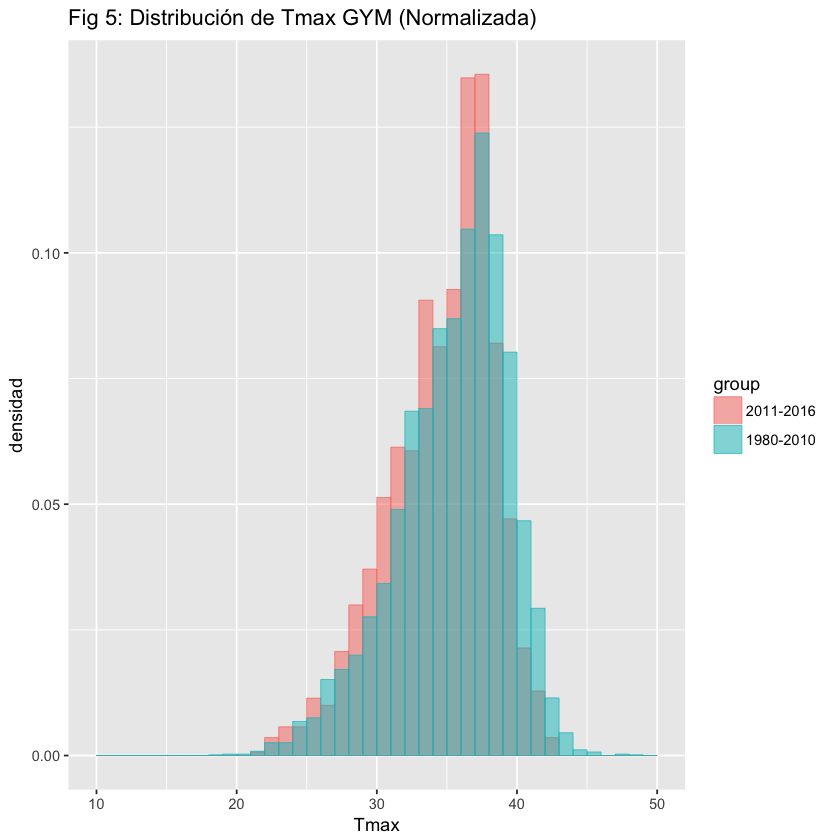

In [26]:
# Combinar los 2 histogramas para hacer la comparación entre las 2 épocas
# Como el número de datos de 1981-2010, es mayor al número de datos de 2011-2017, 
# normalizamos (es decir la suma de áreas es iguañ a 1)
require(ggplot2)
dat1 = data.frame(x=dfNew2$Tmax, group="2011-2016")
dat2 = data.frame(x=df2$Tmax, group="1980-2010")
dat = rbind(dat1, dat2)

ggplot(dat, aes(x, fill=group, colour=group)) +
  geom_histogram(aes(y=..density..), breaks=seq(10,50), alpha=0.5, 
                 position="identity", lwd=0.2) +
  ggtitle("Fig 5: Distribución de Tmax GYM (Normalizada)") +
  scale_y_continuous(name="densidad") +
  scale_x_continuous(name="Tmax", limits=c(10, 50))

Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”

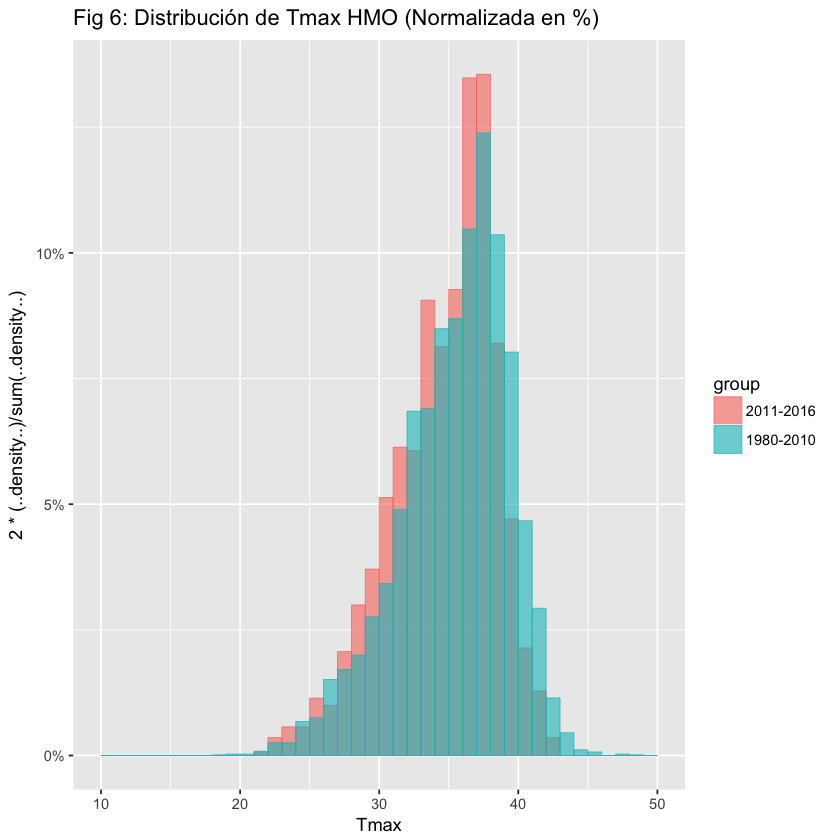

In [27]:
# La misma gráfica anterior pero en porcentaje de área
ggplot(dat, aes(x, fill=group, colour=group)) +
  geom_histogram(aes(y=2*(..density..)/sum(..density..)), breaks=seq(10,50,1), alpha=0.6, 
                 position="identity", lwd=0.2) +
  scale_y_continuous(labels=percent_format()) +
  ggtitle("Fig 6: Distribución de Tmax HMO (Normalizada en %)") +
  scale_x_continuous(name="Tmax", limits=c(10, 50))


Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”

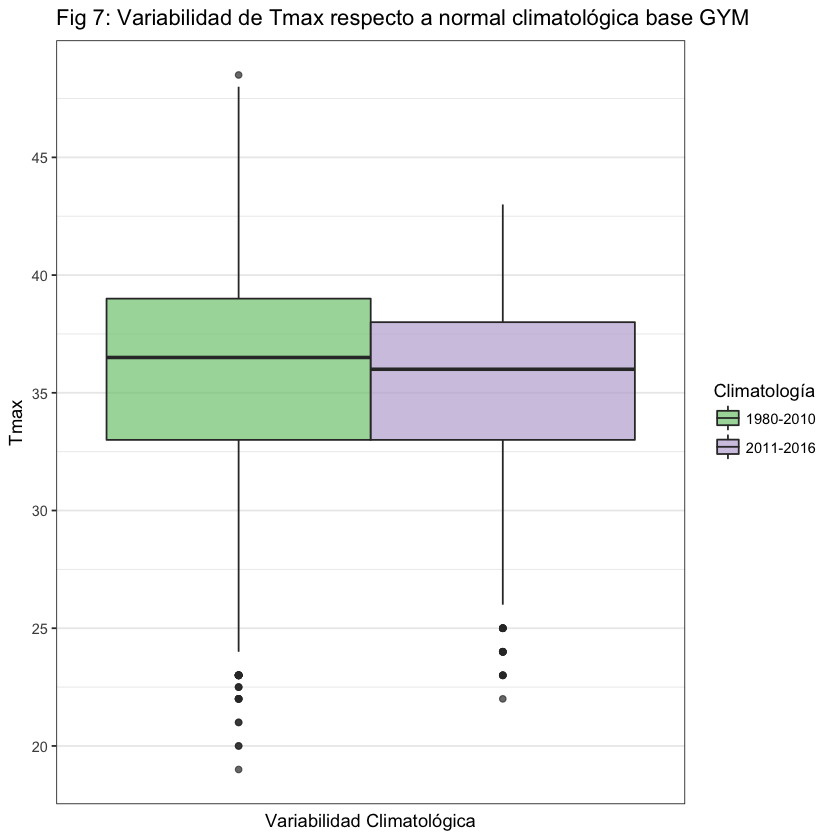

In [28]:
# Unir colecciones de datos 1980-2010 y 2011-2017 para hacer gráfica de cajas
# Nos mostrará la comparación de variabilidad de ambos periodos
datBox1 = data.frame(cbind(df2$Tmax, df2$Month), group="1980-2010")
datBox2 = data.frame(cbind(dfNew2$Tmax, dfNew2$Month), group="2011-2016")
datBox = rbind(datBox1, datBox2)
names(datBox) <- c("Tmax", "Mes", "Grupo")

# gráfica Boxplot comparando el perido reciente respecto a la climatología 1981-2010
p10 <- ggplot(datBox, aes(x = Mes, y = Tmax, fill = Grupo)) +
        geom_boxplot(alpha=0.7) +
        scale_y_continuous(name = "Tmax",
                           breaks = seq(10,50,5)) +
        scale_x_discrete(name = "Variabilidad Climatológica") +
        ggtitle("Fig 7: Variabilidad de Tmax respecto a normal climatológica base GYM") +
        theme_bw() +
        #theme(plot.title = element_text(size = 14, family = "Tahoma", face = "bold"),
        #      text = element_text(size = 12, family = "Tahoma"),
        #      axis.title = element_text(face="bold"),
        #      axis.text.x=element_text(size = 11)) +
        scale_fill_brewer(palette = "Accent") +
        labs(fill = "Climatología")
p10

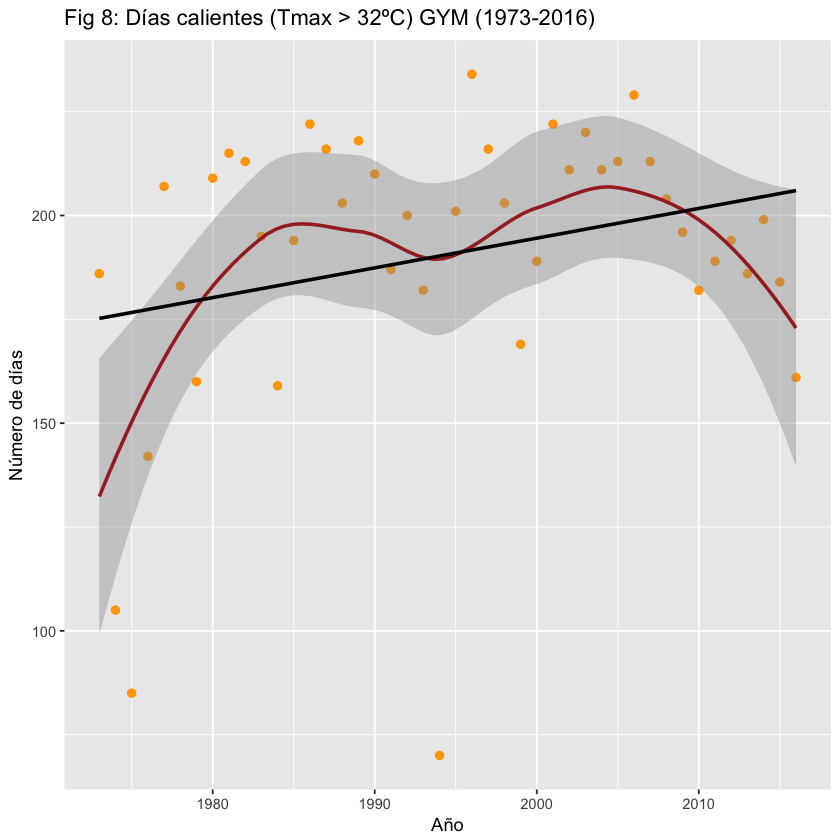

In [34]:
# Hacer un análisis de días calientes
# Number of hot days
Const <- list(T_lim_max = 32.0, T_lim_min=24.0)
hot_days <- c()
df1973 <- df0[(format.Date(df0$date, "%Y") == "1973" & !is.na(df0$date)),]
hot_days[1] <- nrow(subset(df1973, df1973$Tmax>Const[1]))
df1974 <- df0[(format.Date(df0$date, "%Y") == "1974" & !is.na(df0$date)),]
hot_days[2] <- nrow(subset(df1974, df1974$Tmax>Const[1]))
df1975 <- df0[(format.Date(df0$date, "%Y") == "1975" & !is.na(df0$date)),]
hot_days[3] <- nrow(subset(df1975, df1975$Tmax>Const[1]))
df1976 <- df0[(format.Date(df0$date, "%Y") == "1976" & !is.na(df0$date)),]
hot_days[4] <- nrow(subset(df1976, df1976$Tmax>Const[1]))
df1977 <- df0[(format.Date(df0$date, "%Y") == "1977" & !is.na(df0$date)),]
hot_days[5] <- nrow(subset(df1977, df1977$Tmax>Const[1]))
df1978 <- df0[(format.Date(df0$date, "%Y") == "1978" & !is.na(df0$date)),]
hot_days[6] <- nrow(subset(df1978, df1978$Tmax>Const[1]))
df1979 <- df0[(format.Date(df0$date, "%Y") == "1979" & !is.na(df0$date)),]
hot_days[7] <- nrow(subset(df1979, df1979$Tmax>Const[1]))
df1980 <- df0[(format.Date(df0$date, "%Y") == "1980" & !is.na(df0$date)),]
hot_days[8] <- nrow(subset(df1980, df1980$Tmax>Const[1]))
df1981 <- df0[(format.Date(df0$date, "%Y") == "1981" & !is.na(df0$date)),]
hot_days[9] <- nrow(subset(df1981, df1981$Tmax>Const[1]))
df1982 <- df0[(format.Date(df0$date, "%Y") == "1982" & !is.na(df0$date)),]
hot_days[10] <- nrow(subset(df1982, df1982$Tmax>Const[1]))
df1983 <- df0[(format.Date(df0$date, "%Y") == "1983" & !is.na(df0$date)),]
hot_days[11] <- nrow(subset(df1983, df1983$Tmax>Const[1]))
df1984 <- df0[(format.Date(df0$date, "%Y") == "1984" & !is.na(df0$date)),]
hot_days[12] <- nrow(subset(df1984, df1984$Tmax>Const[1]))
df1985 <- df0[(format.Date(df0$date, "%Y") == "1985" & !is.na(df0$date)),]
hot_days[13] <- nrow(subset(df1985, df1985$Tmax>Const[1]))
df1986 <- df0[(format.Date(df0$date, "%Y") == "1986" & !is.na(df0$date)),]
hot_days[14] <- nrow(subset(df1986, df1986$Tmax>Const[1]))
df1987 <- df0[(format.Date(df0$date, "%Y") == "1987" & !is.na(df0$date)),]
hot_days[15] <- nrow(subset(df1987, df1987$Tmax>Const[1]))
df1988 <- df0[(format.Date(df0$date, "%Y") == "1988" & !is.na(df0$date)),]
hot_days[16] <- nrow(subset(df1988, df1988$Tmax>Const[1]))
df1989 <- df0[(format.Date(df0$date, "%Y") == "1989" & !is.na(df0$date)),]
hot_days[17] <- nrow(subset(df1989, df1989$Tmax>Const[1]))
df1990 <- df0[(format.Date(df0$date, "%Y") == "1990" & !is.na(df0$date)),]
hot_days[18] <- nrow(subset(df1990, df1990$Tmax>Const[1]))
df1991 <- df0[(format.Date(df0$date, "%Y") == "1991" & !is.na(df0$date)),]
hot_days[19] <- nrow(subset(df1991, df1991$Tmax>Const[1]))
df1992 <- df0[(format.Date(df0$date, "%Y") == "1992" & !is.na(df0$date)),]
hot_days[20] <- nrow(subset(df1992, df1992$Tmax>Const[1]))
df1993 <- df0[(format.Date(df0$date, "%Y") == "1993" & !is.na(df0$date)),]
hot_days[21] <- nrow(subset(df1993, df1993$Tmax>Const[1]))
df1994 <- df0[(format.Date(df0$date, "%Y") == "1994" & !is.na(df0$date)),]
hot_days[22] <- nrow(subset(df1994, df1994$Tmax>Const[1]))
df1995 <- df0[(format.Date(df0$date, "%Y") == "1995" & !is.na(df0$date)),]
hot_days[23] <- nrow(subset(df1995, df1995$Tmax>Const[1]))
df1996 <- df0[(format.Date(df0$date, "%Y") == "1996" & !is.na(df0$date)),]
hot_days[24] <- nrow(subset(df1996, df1996$Tmax>Const[1]))
df1997 <- df0[(format.Date(df0$date, "%Y") == "1997" & !is.na(df0$date)),]
hot_days[25] <- nrow(subset(df1997, df1997$Tmax>Const[1]))
df1998 <- df0[(format.Date(df0$date, "%Y") == "1998" & !is.na(df0$date)),]
hot_days[26] <- nrow(subset(df1998, df1998$Tmax>Const[1]))
df1999 <- df0[(format.Date(df0$date, "%Y") == "1999" & !is.na(df0$date)),]
hot_days[27] <- nrow(subset(df1999, df1999$Tmax>Const[1]))
df2000 <- df0[(format.Date(df0$date, "%Y") == "2000" & !is.na(df0$date)),]
hot_days[28] <- nrow(subset(df2000, df2000$Tmax>Const[1])) 
df2001 <- df0[(format.Date(df0$date, "%Y") == "2001" & !is.na(df0$date)),]
hot_days[29] <- nrow(subset(df2001, df2001$Tmax>Const[1])) 
df2002 <- df0[(format.Date(df0$date, "%Y") == "2002" & !is.na(df0$date)),]
hot_days[30] <- nrow(subset(df2002, df2002$Tmax>Const[1])) 
df2003 <- df0[(format.Date(df0$date, "%Y") == "2003" & !is.na(df0$date)),]
hot_days[31] <- nrow(subset(df2003, df2003$Tmax>Const[1])) 
df2004 <- df0[(format.Date(df0$date, "%Y") == "2004" & !is.na(df0$date)),]
hot_days[32] <- nrow(subset(df2004, df2004$Tmax>Const[1])) 
df2005 <- df0[(format.Date(df0$date, "%Y") == "2005" & !is.na(df0$date)),]
hot_days[33] <- nrow(subset(df2005, df2005$Tmax>Const[1])) 
df2006 <- df0[(format.Date(df0$date, "%Y") == "2006" & !is.na(df0$date)),]
hot_days[34] <- nrow(subset(df2006, df2006$Tmax>Const[1])) 
df2007 <- df0[(format.Date(df0$date, "%Y") == "2007" & !is.na(df0$date)),]
hot_days[35] <- nrow(subset(df2007, df2007$Tmax>Const[1])) 
df2008 <- df0[(format.Date(df0$date, "%Y") == "2008" & !is.na(df0$date)),]
hot_days[36] <- nrow(subset(df2008, df2008$Tmax>Const[1])) 
df2009 <- df0[(format.Date(df0$date, "%Y") == "2009" & !is.na(df0$date)),]
hot_days[37] <- nrow(subset(df2009, df2009$Tmax>Const[1])) 
df2010 <- df0[(format.Date(df0$date, "%Y") == "2010" & !is.na(df0$date)),]
hot_days[38] <- nrow(subset(df2010, df2010$Tmax>Const[1])) 
df2011 <- df0[(format.Date(df0$date, "%Y") == "2011" & !is.na(df0$date)),]
hot_days[39] <- nrow(subset(df2011, df2011$Tmax>Const[1])) 
df2012 <- df0[(format.Date(df0$date, "%Y") == "2012" & !is.na(df0$date)),]
hot_days[40] <- nrow(subset(df2012, df2012$Tmax>Const[1])) 
df2013 <- df0[(format.Date(df0$date, "%Y") == "2013" & !is.na(df0$date)),]
hot_days[41] <- nrow(subset(df2013, df2013$Tmax>Const[1])) 
df2014 <- df0[(format.Date(df0$date, "%Y") == "2014" & !is.na(df0$date)),]
hot_days[42] <- nrow(subset(df2014, df2014$Tmax>Const[1])) 
df2015 <- df0[(format.Date(df0$date, "%Y") == "2015" & !is.na(df0$date)),]
hot_days[43] <- nrow(subset(df2015, df2015$Tmax>Const[1])) 
df2016 <- df0[(format.Date(df0$date, "%Y") == "2016" & !is.na(df0$date)),]
hot_days[44] <- nrow(subset(df2016, df2016$Tmax>Const[1])) 
hot_days <- data.frame(hot_days)
names(hot_days) <- c("Num_hot_days")
years_seq <- seq(1973, 2016)
hot_days_series <- cbind(years_seq, hot_days)
MA_hot_days <- TTR::EMA(hot_days_series$Num_hot_days, n=2, ratio=2/(5+1))
MA_hot_days_series <- data.frame(cbind(years_seq, MA_hot_days))
ggplot(hot_days_series, aes(years_seq, Num_hot_days)) +
           geom_point(na.rm=TRUE, color="orange", size=2) + 
           geom_smooth(method=loess, span = 0.4, color="brown") +
           geom_smooth(method = "lm", se=FALSE, color="black") +
           ggtitle("Fig 8: Días calientes (Tmax > 32ºC) GYM (1973-2016)") +
           xlab("Año") + ylab("Número de días")
#          + geom_line(data=MA_hot_days_series, aes(years_seq, MA_hot_days, colour="brown"), 
#                     show.legend=FALSE, size=2) 
# Get the values
# Get the values
# smooth_vals = predict(loess(dist~speed,cars), cars$speed)
smooth_vals = predict(loess(Num_hot_days~years_seq, hot_days_series), hot_days_series$years_seq)

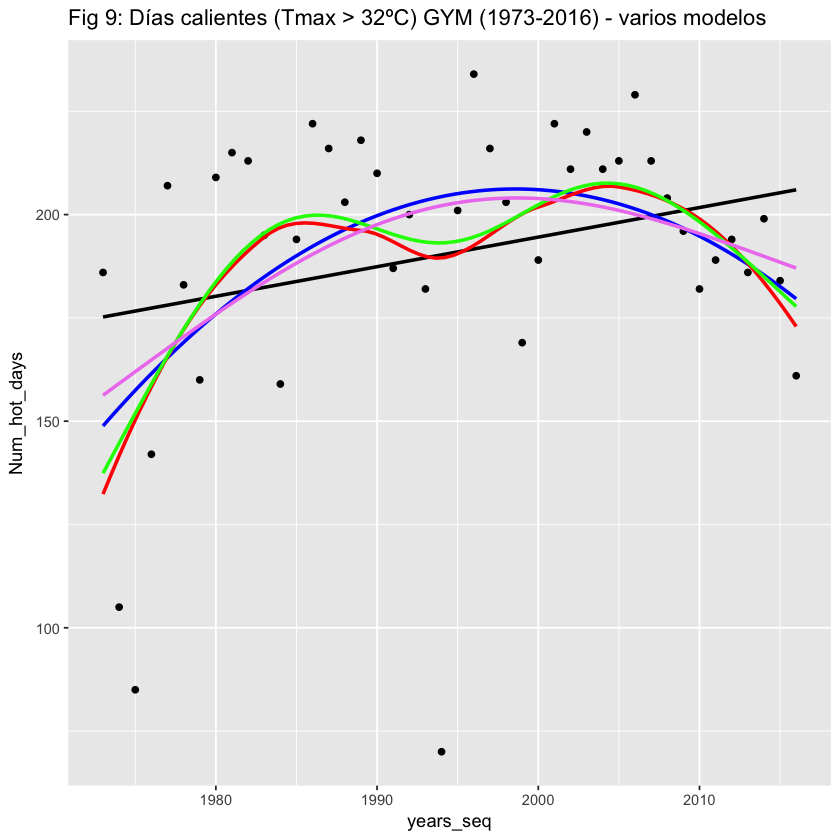

In [56]:
p <- ggplot(hot_days_series, aes(x = years_seq, y = Num_hot_days)) + geom_point()
p + stat_smooth(method = "lm", formula = y ~ x, size = 1, se = FALSE,
    colour = "black") + stat_smooth(method = "lm", formula = y ~ x + I(x^2),
    size = 1, se = FALSE, colour = "blue") + stat_smooth(method = "loess", formula = y ~
    x, size = 1, se = FALSE, colour = "red") + stat_smooth(method = "gam", formula = y ~
    s(x), size = 1, se = FALSE, colour = "green") + stat_smooth(method = "gam",
    formula = y ~ s(x, k = 3), size = 1, se = FALSE, colour = "violet") +
    ggtitle("Fig 9: Días calientes (Tmax > 32ºC) GYM (1973-2016) - varios modelos") 

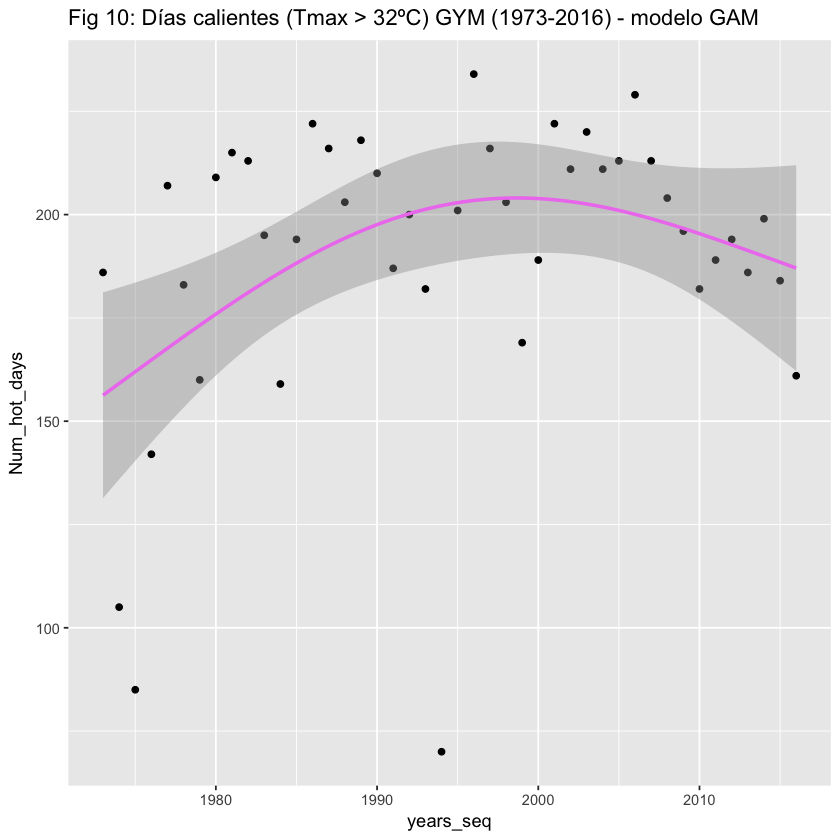

In [57]:
# Plot single method: gam (General Additive Model)
# The GAM with a smooth seems to fit the data better than the straight line did. 
# We could also customize the basis dimension. Arbitrarily, we choose 3.
p <- ggplot(hot_days_series, aes(x = years_seq, y = Num_hot_days)) + geom_point()
p + stat_smooth(method = "gam", formula = y ~ s(x, k = 3), size = 1, colour = "violet") +
ggtitle("Fig 10: Días calientes (Tmax > 32ºC) GYM (1973-2016) - modelo GAM")

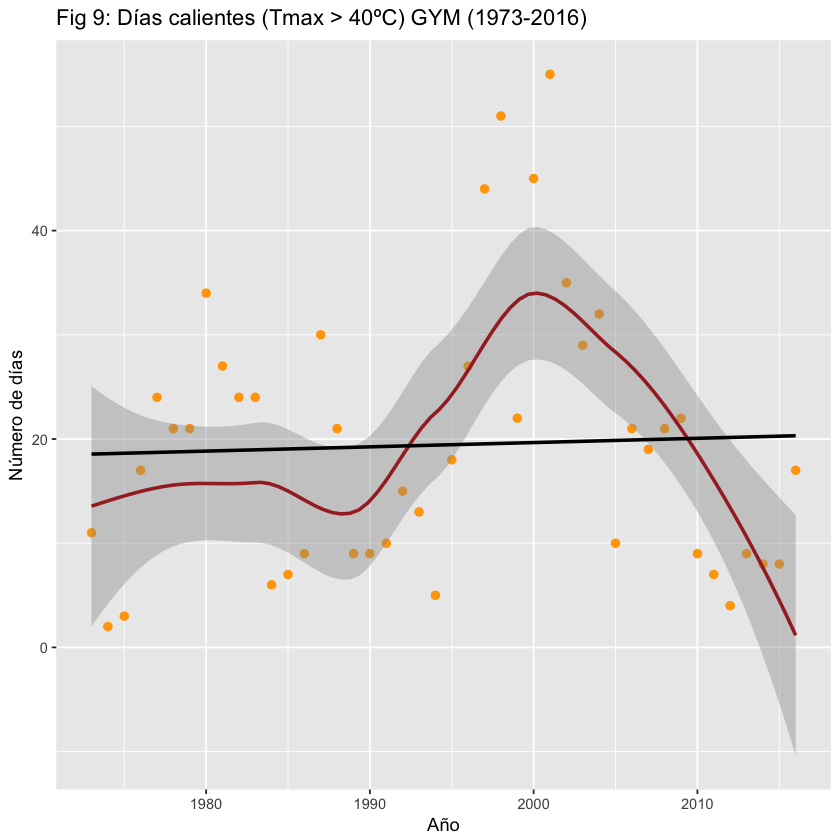

In [30]:
# Tmax > 40ºC
# Hacer un análisis de días calientes
# Número de días calientes
Const <- list(T_lim_max = 40.0, T_lim_min=24.0)
hot_days <- c()
df1973 <- df0[(format.Date(df0$date, "%Y") == "1973" & !is.na(df0$date)),]
hot_days[1] <- nrow(subset(df1973, df1973$Tmax>Const[1]))
df1974 <- df0[(format.Date(df0$date, "%Y") == "1974" & !is.na(df0$date)),]
hot_days[2] <- nrow(subset(df1974, df1974$Tmax>Const[1]))
df1975 <- df0[(format.Date(df0$date, "%Y") == "1975" & !is.na(df0$date)),]
hot_days[3] <- nrow(subset(df1975, df1975$Tmax>Const[1]))
df1976 <- df0[(format.Date(df0$date, "%Y") == "1976" & !is.na(df0$date)),]
hot_days[4] <- nrow(subset(df1976, df1976$Tmax>Const[1]))
df1977 <- df0[(format.Date(df0$date, "%Y") == "1977" & !is.na(df0$date)),]
hot_days[5] <- nrow(subset(df1977, df1977$Tmax>Const[1]))
df1978 <- df0[(format.Date(df0$date, "%Y") == "1978" & !is.na(df0$date)),]
hot_days[6] <- nrow(subset(df1978, df1978$Tmax>Const[1]))
df1979 <- df0[(format.Date(df0$date, "%Y") == "1979" & !is.na(df0$date)),]
hot_days[7] <- nrow(subset(df1979, df1979$Tmax>Const[1]))
df1980 <- df0[(format.Date(df0$date, "%Y") == "1980" & !is.na(df0$date)),]
hot_days[8] <- nrow(subset(df1980, df1980$Tmax>Const[1]))
df1981 <- df0[(format.Date(df0$date, "%Y") == "1981" & !is.na(df0$date)),]
hot_days[9] <- nrow(subset(df1981, df1981$Tmax>Const[1]))
df1982 <- df0[(format.Date(df0$date, "%Y") == "1982" & !is.na(df0$date)),]
hot_days[10] <- nrow(subset(df1982, df1982$Tmax>Const[1]))
df1983 <- df0[(format.Date(df0$date, "%Y") == "1983" & !is.na(df0$date)),]
hot_days[11] <- nrow(subset(df1983, df1983$Tmax>Const[1]))
df1984 <- df0[(format.Date(df0$date, "%Y") == "1984" & !is.na(df0$date)),]
hot_days[12] <- nrow(subset(df1984, df1984$Tmax>Const[1]))
df1985 <- df0[(format.Date(df0$date, "%Y") == "1985" & !is.na(df0$date)),]
hot_days[13] <- nrow(subset(df1985, df1985$Tmax>Const[1]))
df1986 <- df0[(format.Date(df0$date, "%Y") == "1986" & !is.na(df0$date)),]
hot_days[14] <- nrow(subset(df1986, df1986$Tmax>Const[1]))
df1987 <- df0[(format.Date(df0$date, "%Y") == "1987" & !is.na(df0$date)),]
hot_days[15] <- nrow(subset(df1987, df1987$Tmax>Const[1]))
df1988 <- df0[(format.Date(df0$date, "%Y") == "1988" & !is.na(df0$date)),]
hot_days[16] <- nrow(subset(df1988, df1988$Tmax>Const[1]))
df1989 <- df0[(format.Date(df0$date, "%Y") == "1989" & !is.na(df0$date)),]
hot_days[17] <- nrow(subset(df1989, df1989$Tmax>Const[1]))
df1990 <- df0[(format.Date(df0$date, "%Y") == "1990" & !is.na(df0$date)),]
hot_days[18] <- nrow(subset(df1990, df1990$Tmax>Const[1]))
df1991 <- df0[(format.Date(df0$date, "%Y") == "1991" & !is.na(df0$date)),]
hot_days[19] <- nrow(subset(df1991, df1991$Tmax>Const[1]))
df1992 <- df0[(format.Date(df0$date, "%Y") == "1992" & !is.na(df0$date)),]
hot_days[20] <- nrow(subset(df1992, df1992$Tmax>Const[1]))
df1993 <- df0[(format.Date(df0$date, "%Y") == "1993" & !is.na(df0$date)),]
hot_days[21] <- nrow(subset(df1993, df1993$Tmax>Const[1]))
df1994 <- df0[(format.Date(df0$date, "%Y") == "1994" & !is.na(df0$date)),]
hot_days[22] <- nrow(subset(df1994, df1994$Tmax>Const[1]))
df1995 <- df0[(format.Date(df0$date, "%Y") == "1995" & !is.na(df0$date)),]
hot_days[23] <- nrow(subset(df1995, df1995$Tmax>Const[1]))
df1996 <- df0[(format.Date(df0$date, "%Y") == "1996" & !is.na(df0$date)),]
hot_days[24] <- nrow(subset(df1996, df1996$Tmax>Const[1]))
df1997 <- df0[(format.Date(df0$date, "%Y") == "1997" & !is.na(df0$date)),]
hot_days[25] <- nrow(subset(df1997, df1997$Tmax>Const[1]))
df1998 <- df0[(format.Date(df0$date, "%Y") == "1998" & !is.na(df0$date)),]
hot_days[26] <- nrow(subset(df1998, df1998$Tmax>Const[1]))
df1999 <- df0[(format.Date(df0$date, "%Y") == "1999" & !is.na(df0$date)),]
hot_days[27] <- nrow(subset(df1999, df1999$Tmax>Const[1]))
df2000 <- df0[(format.Date(df0$date, "%Y") == "2000" & !is.na(df0$date)),]
hot_days[28] <- nrow(subset(df2000, df2000$Tmax>Const[1])) 
df2001 <- df0[(format.Date(df0$date, "%Y") == "2001" & !is.na(df0$date)),]
hot_days[29] <- nrow(subset(df2001, df2001$Tmax>Const[1])) 
df2002 <- df0[(format.Date(df0$date, "%Y") == "2002" & !is.na(df0$date)),]
hot_days[30] <- nrow(subset(df2002, df2002$Tmax>Const[1])) 
df2003 <- df0[(format.Date(df0$date, "%Y") == "2003" & !is.na(df0$date)),]
hot_days[31] <- nrow(subset(df2003, df2003$Tmax>Const[1])) 
df2004 <- df0[(format.Date(df0$date, "%Y") == "2004" & !is.na(df0$date)),]
hot_days[32] <- nrow(subset(df2004, df2004$Tmax>Const[1])) 
df2005 <- df0[(format.Date(df0$date, "%Y") == "2005" & !is.na(df0$date)),]
hot_days[33] <- nrow(subset(df2005, df2005$Tmax>Const[1])) 
df2006 <- df0[(format.Date(df0$date, "%Y") == "2006" & !is.na(df0$date)),]
hot_days[34] <- nrow(subset(df2006, df2006$Tmax>Const[1])) 
df2007 <- df0[(format.Date(df0$date, "%Y") == "2007" & !is.na(df0$date)),]
hot_days[35] <- nrow(subset(df2007, df2007$Tmax>Const[1])) 
df2008 <- df0[(format.Date(df0$date, "%Y") == "2008" & !is.na(df0$date)),]
hot_days[36] <- nrow(subset(df2008, df2008$Tmax>Const[1])) 
df2009 <- df0[(format.Date(df0$date, "%Y") == "2009" & !is.na(df0$date)),]
hot_days[37] <- nrow(subset(df2009, df2009$Tmax>Const[1])) 
df2010 <- df0[(format.Date(df0$date, "%Y") == "2010" & !is.na(df0$date)),]
hot_days[38] <- nrow(subset(df2010, df2010$Tmax>Const[1])) 
df2011 <- df0[(format.Date(df0$date, "%Y") == "2011" & !is.na(df0$date)),]
hot_days[39] <- nrow(subset(df2011, df2011$Tmax>Const[1])) 
df2012 <- df0[(format.Date(df0$date, "%Y") == "2012" & !is.na(df0$date)),]
hot_days[40] <- nrow(subset(df2012, df2012$Tmax>Const[1])) 
df2013 <- df0[(format.Date(df0$date, "%Y") == "2013" & !is.na(df0$date)),]
hot_days[41] <- nrow(subset(df2013, df2013$Tmax>Const[1])) 
df2014 <- df0[(format.Date(df0$date, "%Y") == "2014" & !is.na(df0$date)),]
hot_days[42] <- nrow(subset(df2014, df2014$Tmax>Const[1])) 
df2015 <- df0[(format.Date(df0$date, "%Y") == "2015" & !is.na(df0$date)),]
hot_days[43] <- nrow(subset(df2015, df2015$Tmax>Const[1])) 
df2016 <- df0[(format.Date(df0$date, "%Y") == "2016" & !is.na(df0$date)),]
hot_days[44] <- nrow(subset(df2016, df2016$Tmax>Const[1])) 
hot_days <- data.frame(hot_days)
names(hot_days) <- c("Num_hot_days")
years_seq <- seq(1973, 2016)
hot_days_series <- cbind(years_seq, hot_days)
MA_hot_days <- TTR::EMA(hot_days_series$Num_hot_days, n=2, ratio=2/(5+1))
MA_hot_days_series <- data.frame(cbind(years_seq, MA_hot_days))
ggplot(hot_days_series, aes(years_seq, Num_hot_days)) +
           geom_point(na.rm=TRUE, color="orange", size=2) + 
           geom_smooth(method=loess, span = 0.4, color="brown") +
            geom_smooth(method = "lm", se=FALSE, color="black") +
           ggtitle("Fig 11: Días calientes (Tmax > 40ºC) GYM (1973-2016)") +
           xlab("Año") + ylab("Número de días")

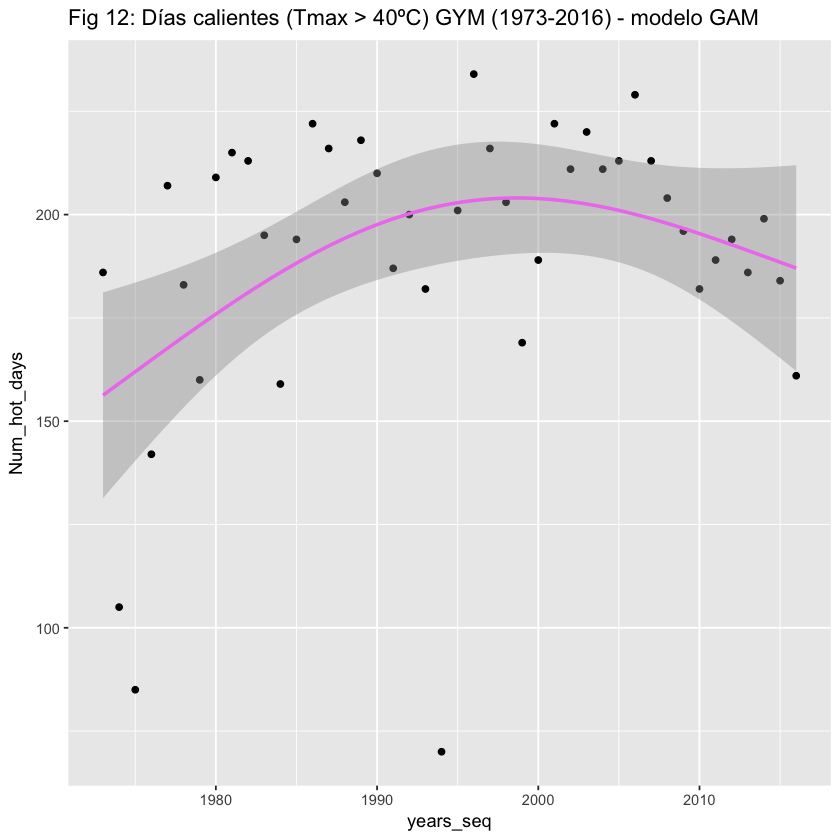

In [55]:
# Plot single method: gam (General Additive Model)
# The GAM with a smooth seems to fit the data better than the straight line did. 
# We could also customize the basis dimension. Arbitrarily, we choose 3.
p <- ggplot(hot_days_series, aes(x = years_seq, y = Num_hot_days)) + geom_point()
p + stat_smooth(method = "gam", formula = y ~ s(x, k = 3), size = 1, colour = "violet") +
ggtitle("Fig 12: Días calientes (Tmax > 40ºC) GYM (1973-2016) - modelo GAM")

ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


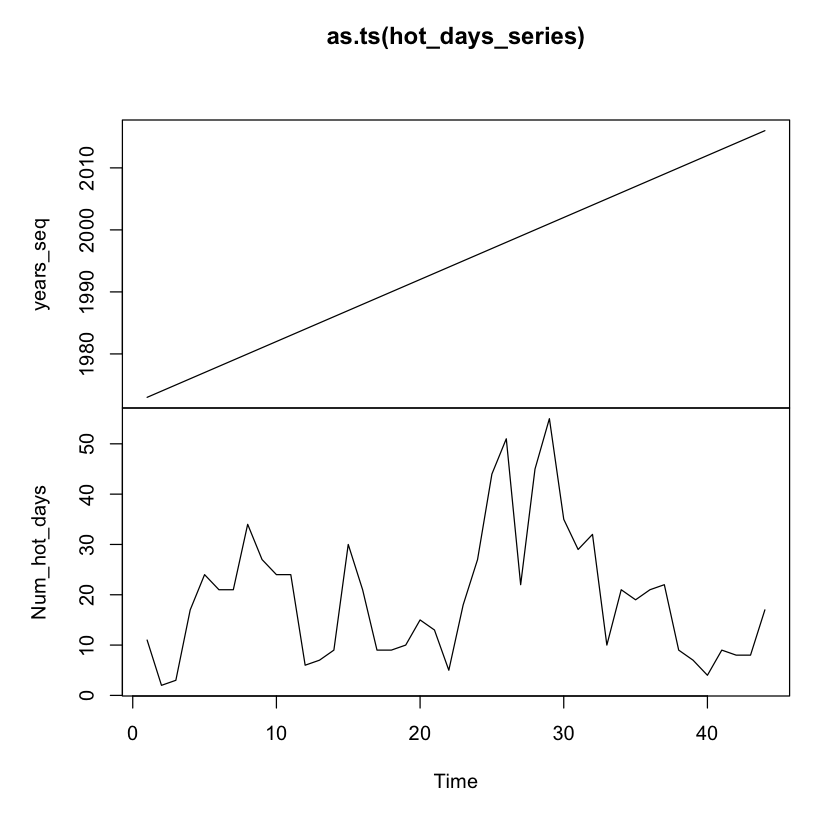

In [31]:
library(forecast)
trend_GYM = ma(hot_days_series, order = 20, centre = T)
plot(as.ts(hot_days_series))
lines(trend_GYM)
plot(as.ts(trend_GYM))

In [32]:
require(tseries)
adf.test(hot_days_series$Num_hot_days)

Loading required package: tseries



	Augmented Dickey-Fuller Test

data:  hot_days_series$Num_hot_days
Dickey-Fuller = -2.2485, Lag order = 3, p-value = 0.4754
alternative hypothesis: stationary
